### Maximum Likelihood Estimator

#### Estimator Derivation

For a set of measurements, $\{x_i\}$, which are assumed to be unbiased with a Gaussian noise distribution, the probability of obtaining any one measurement $x_i$ is given by,

\begin{align}
P\left( x_i | x \right) = \frac{1}{\sqrt{2\pi}\sigma_i}e^{-\frac{\left( x_i - \overline{x} \right)^2}{2\sigma^2}}
\end{align}

where $\overline{x}$ is the true value of $x$. The probability of obtaining the set of measurements $\{x_i\}$ is the product of the probabilities of obtaining each measurement separately,

\begin{align}
    P\left(\{x_i\} | x \right) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi}\sigma_i}e^{-\frac{\left( x_i - \overline{x} \right)^2}{2\sigma^2}}
\end{align}

where there are $N$ measurements. To obtain the Maximum Likelihood Estimator for the value $\overline{x}$, maximise the probability $P\left(\{x_i\} | x \right)$
\begin{align}
    \frac{d\left( P\left(\{x_i\} | x \right) \right)}{dx}  = 0
\end{align}
then,
\begin{align}
    \frac{d\left( ln\left[P\left(\{x_i\} | x \right)\right] \right]}{dx} &= \frac{d}{dx}\left[ \frac{1}{2} n \mathrm{ln}(2\pi) - n\sum_{i=1}^{N}\mathrm{ln}(\sigma_i) - \sum_{i=1}^{N}\frac{\left( x_i - \overline{x} \right)^2}{2\sigma_i^2} \right] \\
    &= \sum_{i=1}^{N} \frac{x_i-\overline{x}}{\sigma_i^2} \\
    &= \sum_{i=1}^{N} \frac{x_i}{\sigma_i^2} - \overline{x} \sum_{i=1}^{N} \frac{1}{\sigma_i^2} \\
    &\therefore \overline{x} = \left. \sum_{i=1}^{N} \frac{x_i}{\sigma_i^2} \middle/ \sum_{i=1}^{N} \frac{1}{\sigma_i^2} \right. \label{eqn:MLE}
\end{align}

#### Estimator Calculation

In [8]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

In [9]:
# x_i, sigma_i
measurements = [
    [1.10, 0.05],
    [1.01, 0.01],
    [0.99, 0.01],
    [0.98, 0.01],
    [1.00, 0.02],
    [1.30, 0.4],
]

In [10]:
numerator = 0
denominator = 0
for measurement in measurements:
    numerator += measurement[0] / measurement[1]**2
    denominator += 1.0 / measurement[1]**2

estimator = numerator / denominator

print("The maximum likelihood estimator for the true value is {:.2f}".format(estimator))

The maximum likelihood estimator for the true value is 1.00


#### Estimator Calculation over time

In [24]:
actual_mean_average = 1.0
actual_mean_spread = 0.05

actual_error_average = 0.05
actual_error_spread = 0.005

n_measurements = []
estimators = []

numerator = 0
denominator = 0
n_measurement = 1000
for i in range(n_measurement):
    n_measurements.append(i)
    value = np.random.normal(actual_mean_average, actual_mean_spread)
    error = np.random.normal(actual_error_average, actual_error_spread)
    
    measurement = [value, error]

    numerator += measurement[0] / measurement[1]**2
    denominator += 1.0 / measurement[1]**2

    estimators.append(numerator / denominator)

<Figure size 432x288 with 0 Axes>

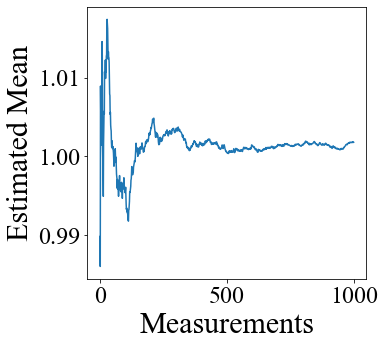

In [25]:
# Create plot of estimated mean vs the number of measurements.

plt.clf()
fig = plt.figure(figsize=(5,5))

plt.plot(n_measurements, estimators)

plt.ylabel('Estimated Mean', fontsize=30)
plt.xlabel('Measurements', fontsize=30)

plt.tick_params(labelsize=24)

plt.show()